In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Boston Demo data
We will pick `average number of rooms per dwelling` or the `RM` variable.
It is a **ratio-scale** variable

In [2]:
from sklearn.datasets import load_boston
tmp = load_boston()
#print(tmp.DESCR)
#tmp.feature_names[5]
x = tmp.data[:,5]

## Scale data

In [3]:
from pctl_scale import percentile_scale
lower=.05
upper=.95
y, vd, vu = percentile_scale(x, d=lower, u=upper)

Show results

In [4]:
print("{0:3.0f}% percentile value: {1:8.4f}".format(lower*100, vd))
print("{0:3.0f}% percentile value: {1:8.4f}".format(upper*100, vu))

  5% percentile value:   5.3140
 95% percentile value:   7.5875


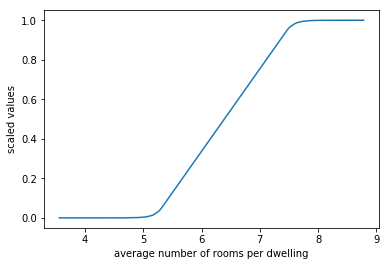

In [5]:
idx = x.argsort()
plt.plot(x[idx], y[idx]);
plt.xlabel('average number of rooms per dwelling');
plt.ylabel('scaled values');

## Missing Values
Let's introduce some missing data

In [6]:
x = tmp.data[:,5]
x[:20] = np.nan
x[21:40] = np.inf
x[41:60] = -np.inf
x[61:80] = None
np.random.shuffle(x)

In [7]:
lower=.05
upper=.95
naimpute = 0
y, vd, vu = percentile_scale(x, d=lower, u=upper, naimpute=naimpute, naignore=None)

The percentiles changed towards zero because this is the bias when removing data from a ratio-scale variable.

In [8]:
print("{0:3.0f}% percentile value: {1:8.4f}".format(lower*100, vd))
print("{0:3.0f}% percentile value: {1:8.4f}".format(upper*100, vu))

  5% percentile value:   5.2204
 95% percentile value:   7.7354


The graph will look ok because, the missing values `x` are ignored.

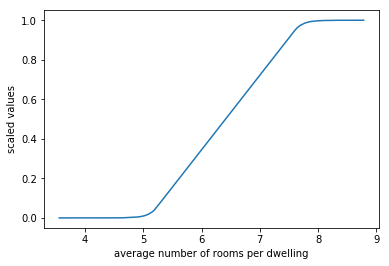

In [9]:
idx = x.argsort()
plt.plot(x[idx], y[idx]);
plt.xlabel('average number of rooms per dwelling');
plt.ylabel('scaled values');

Let's examine how `np.nan` values were transformed.

In [10]:
y[np.isnan(x)]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])